# Deriving the PDF of Orion A

In [2]:
%matplotlib inline

Import packages

In [3]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from astropy import units as u
import aplpy

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [65]:
mpl.rc("xtick", direction='in')
mpl.rc("ytick", direction='in')
#define input and output file name, and import N_H2 map
N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.fits'
fig_file='PDF_1.png'
hdu=fits.open(N_file)

data1 = hdu[0].data

#define the region to statistic
x0=600
y0=700
x1=800
y1=1600

In [67]:
#define normal , double peak normal and linear function
def normal(eta,p0,sig0,eta0) :
    return p0 / np.sqrt(2*np.pi*sig0**2) *np.exp( -(eta-eta0)**2 /(2*sig0**2) )

def double_peak(eta,p0,p1,sig0,sig1,eta0,eta1) :
    return ( p0 / np.sqrt(2*np.pi*sig0**2) *np.exp(-(eta-eta0)**2 /(2*sig0**2)) + p1 / np.sqrt(2*np.pi*sig1**2) *np.exp(-(eta-eta1)**2 /(2*sig1**2)) )

def linear(eta,m,b) :
    return m*eta+b

#crop the region and wipe out nan
data=hdu[0].data[y0-1:y1,x0-1:x1]
data=data[data==data].flatten()

#statistic the data
mean=data.mean()
eta_array=np.log(data/mean) #eta = ln(N/N_mean)
print('Mean:',mean,'\n')


('Mean:', 2.4098811219914906e+22, '\n')


('p0:', 0.84919141391436614, 'p1:', 0.056946406710122612)
('sigma0:', 0.64973455635986566, 'sigma1:', 0.35538034204865576)
('eta0:', -0.45463236661556805, 'eta1:', 0.91724536921200139, '\n')
('m:', -3.1976529932372291)


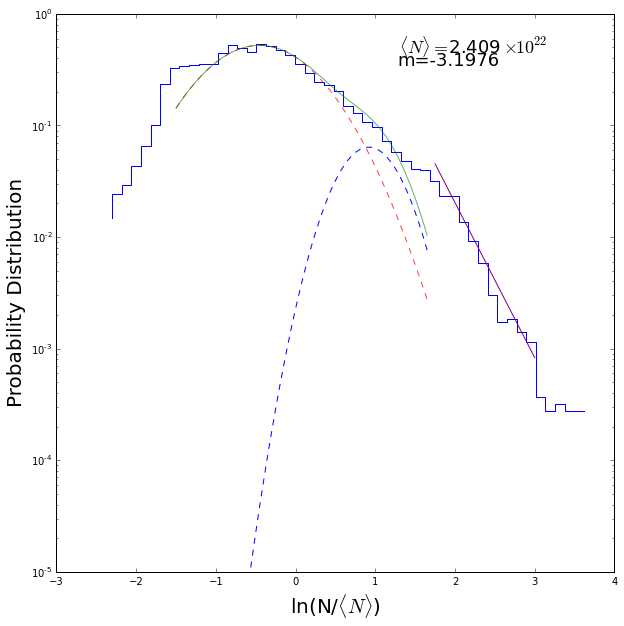

In [11]:
prob_den,bins=np.histogram(eta_array,bins=50,density=True)
bin_value=0.5*(bins[1:]+bins[:-1])

#plot the PDF
plt.figure(figsize=(10,10))
plt.plot(bin_value,prob_den,linestyle='steps-',color='blue')
plt.ylabel('Probability Distribution',size=20)
plt.xlabel(r'ln(N/$\langle N \rangle$)',size=20)
plt.yscale('log')
plt.ylim(0.00001,1)
text_mean=str(mean)
text_mean=r'$\langle N \rangle=$'+text_mean[:5]+r'$\times 10^{22}$'
plt.text(1.3,0.45,text_mean,size=18)

#define the range to fit
fit_lower=-1.
fit_upper=1.2
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[prob_den[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]

#fit the double peak curve
popt,pcov=curve_fit(double_peak,xdata,ydata,p0=[0.4,0.5,1,1,-1,-0.1])
print('p0:',popt[0],'p1:',popt[1])
print('sigma0:',popt[2],'sigma1:',popt[3])
print('eta0:',popt[4],'eta1:',popt[5],'\n')
#plot the curve
x=np.arange(fit_lower-0.5,fit_upper+0.5,0.05)
plt.plot(x,normal(x,popt[0],popt[2],popt[4]),'--',color='red',alpha=0.75)
plt.plot(x,normal(x,popt[1],popt[3],popt[5]),'--',color='blue',alpha=1)
plt.plot(x,double_peak(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),'-',color='green',alpha=0.6)

#fit the power tail
fit_lower=1.8
fit_upper=3
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[np.log(prob_den[i]) for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
popt,pcov=curve_fit(linear,xdata,ydata,p0=[-1,1])
print('m:',popt[0])

#plot the power tail
x=np.arange(fit_lower-0.05,fit_upper+0.05,0.05)
y=np.exp(linear(x,popt[0],popt[1]))
plt.plot(x,y,'-',color='purple')
text_m=str(popt[0])[:7]
text_m='m='+text_m
plt.text(1.3,0.35,text_m,size=18)

('p:', 0.91124573683366217)
('sigma:', 0.71009255901639345)
('eta', -0.45186717154784944, '\n')
('m:', -2.2571339414965541)


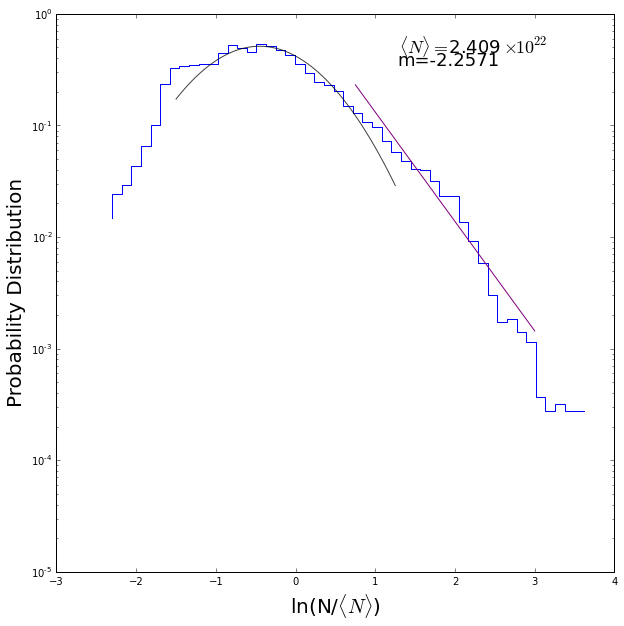

In [12]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.fits'
fig_file='PDF_1.png'
hdu=fits.open(N_file)

#define normal , double peak normal and linear function
def normal(eta,p0,sig0,eta0) :
    return p0 / np.sqrt(2*np.pi*sig0**2) *np.exp( -(eta-eta0)**2 /(2*sig0**2) )

def double_peak(eta,p0,p1,sig0,sig1,eta0,eta1) :
    return ( p0 / np.sqrt(2*np.pi*sig0**2) *np.exp(-(eta-eta0)**2 /(2*sig0**2)) + p1 / np.sqrt(2*np.pi*sig1**2) *np.exp(-(eta-eta1)**2 /(2*sig1**2)) )

def linear(eta,m,b) :
    return m*eta+b

#define the region to statistic
#this is for region 1
x0=600
y0=700
x1=800
y1=1600

#crop the region and wipe out nan
data=hdu[0].data[y0-1:y1,x0-1:x1]
data=data[data==data].flatten()

#statistic the data
mean=data.mean()
eta_array=np.log(data/mean) #eta = ln(N/N_mean)

prob_den,bins=np.histogram(eta_array,bins=50,density=True)
bin_value=0.5*(bins[1:]+bins[:-1])

#plot the PDF
plt.figure(figsize=(10,10))
plt.plot(bin_value,prob_den,linestyle='steps-',color='blue')
plt.ylabel('Probability Distribution',size=20)
plt.xlabel(r'ln(N/$\langle N \rangle$)',size=20)
plt.yscale('log')
plt.ylim(0.00001,1)
text_mean=str(mean)
text_mean=r'$\langle N \rangle=$'+text_mean[:5]+r'$\times 10^{22}$'
plt.text(1.3,0.45,text_mean,size=18)

#define the range to fit
fit_lower=-1.
fit_upper=0.8
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[prob_den[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]

#fit the one peak
x=np.arange(fit_lower-0.5,fit_upper+0.5,0.05)
popt,pcov=curve_fit(normal,xdata,ydata,p0=[0.5,1,0])
print('p:',popt[0])
print('sigma:',popt[1])
print('eta',popt[2],'\n')

#plot the one peak curve
plt.plot(x,normal(x,popt[0],popt[1],popt[2]),color='black',alpha=0.75)

#fit the power tail
fit_lower=0.8
fit_upper=3.
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[np.log(prob_den[i]) for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
popt,pcov=curve_fit(linear,xdata,ydata,p0=[-1,1])
print('m:',popt[0])

#plot the power tail
x=np.arange(fit_lower-0.05,fit_upper+0.05,0.05)
y=np.exp(linear(x,popt[0],popt[1]))
plt.plot(x,y,'-',color='purple')
text_m=str(popt[0])[:7]
text_m='m='+text_m
plt.text(1.3,0.35,text_m,size=18)

plt.show()


# New Try for OMC-2

Show the region to statistic (N>2.3e22)

INFO: Auto-setting vmin to -9.311e+21 [aplpy.core]
INFO: Auto-setting vmax to  1.506e+23 [aplpy.core]
INFO: Auto-setting vmin to  3.901e+21 [aplpy.core]
INFO: Auto-setting vmax to  1.360e+23 [aplpy.core]


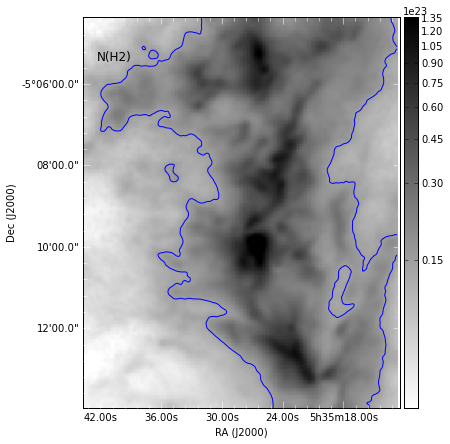

In [80]:
mpl.rc("xtick", direction='in')
mpl.rc("ytick", direction='in')
#define input and output file name, and import N_H2 map
N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.omc2.fits'
fig_file_omc2='PDF_omc2.png'
f_omc2 = aplpy.FITSFigure('/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.omc2.fits', figsize=(7,7))
#f_omc2.colorbar.set_axis_label_text('N(H2)(cm-2)')
f_omc2.add_label(0.1,0.9, 'N(H2)', color='black', relative=True, size='large',layer='source')
f_omc2.show_grayscale()
f_omc2.add_colorbar()
f_omc2.colorbar.show()

f_omc2.recenter(83.867,-5.1526276,width=0.13,height=0.16)
f_omc2.show_contour('/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.omc2.fits',levels=[1.5e22],colors='blue',width='2')
f_omc2.show_colorscale(cmap='gist_yarg',stretch='log')

hdu=fits.open(N_file)
data1 = hdu[0].data


Statistic the data from this region

In [81]:
data = []
for i in range(0,data1.shape[0]):
  for j in range(0,data1.shape[1]):
       if data1[i][j]>1.5e22:
            data.append(data1[i][j])

data = np.array(data)
#statistic the data
mean=data.mean()
eta_array=np.log(data/mean) #eta = ln(N/N_mean)
print('Mean:',mean,'\n')
print data

('Mean:', 3.1721055939156798e+22, '\n')
[  1.52281944e+22   1.56987007e+22   1.61745734e+22 ...,   1.61634871e+22
   1.57415933e+22   1.52449536e+22]


In [82]:
#define normal , double peak normal and linear function
def normal(eta,p0,sig0,eta0) :
    return p0 / np.sqrt(2*np.pi*sig0**2) *np.exp( -(eta-eta0)**2 /(2*sig0**2) )

def double_peak(eta,p0,p1,sig0,sig1,eta0,eta1) :
    return ( p0 / np.sqrt(2*np.pi*sig0**2) *np.exp(-(eta-eta0)**2 /(2*sig0**2)) + p1 / np.sqrt(2*np.pi*sig1**2) *np.exp(-(eta-eta1)**2 /(2*sig1**2)) )

def linear(eta,m,b) :
    return m*eta+b


('p:', 2.7143413730738253)
('sigma:', 0.86185755208243786)
('eta', -1.0028727940769455, '\n')
('m:', -4.5258718109424763)


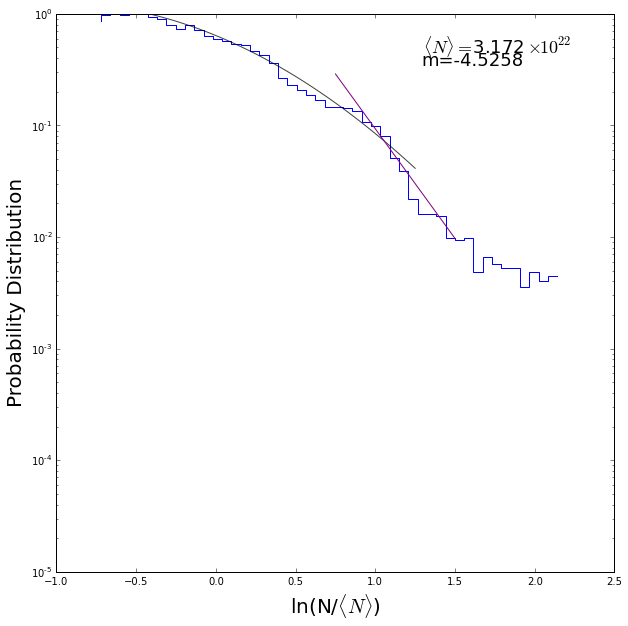

In [83]:
prob_den,bins=np.histogram(eta_array,bins=50,density=True)
bin_value=0.5*(bins[1:]+bins[:-1])

#plot the PDF
plt.figure(figsize=(10,10))
plt.plot(bin_value,prob_den,linestyle='steps-',color='blue')
plt.ylabel('Probability Distribution',size=20)
plt.xlabel(r'ln(N/$\langle N \rangle$)',size=20)
plt.yscale('log')
plt.ylim(0.00001,1)
text_mean=str(mean)
text_mean=r'$\langle N \rangle=$'+text_mean[:5]+r'$\times 10^{22}$'
plt.text(1.3,0.45,text_mean,size=18)

#define the range to fit
fit_lower=-0.5
fit_upper=0.8
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[prob_den[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]

#fit the one peak
x=np.arange(fit_lower-0.5,fit_upper+0.5,0.05)
popt,pcov=curve_fit(normal,xdata,ydata,p0=[0.5,1,0])
print('p:',popt[0])
print('sigma:',popt[1])
print('eta',popt[2],'\n')

#plot the one peak curve
plt.plot(x,normal(x,popt[0],popt[1],popt[2]),color='black',alpha=0.75)

#fit the power tail
fit_lower=0.8
fit_upper=1.5
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[np.log(prob_den[i]) for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
popt,pcov=curve_fit(linear,xdata,ydata,p0=[-1,1])
print('m:',popt[0])

#plot the power tail
x=np.arange(fit_lower-0.05,fit_upper+0.05,0.05)
y=np.exp(linear(x,popt[0],popt[1]))
plt.plot(x,y,'-',color='purple')
text_m=str(popt[0])[:7]
text_m='m='+text_m
plt.text(1.3,0.35,text_m,size=18)

plt.show()


Profile of column density N in a filament

In [24]:
N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.fits'
fig_file='PDF_1.png'
hdu=fits.open(N_file)
data1 = hdu[0].data

l= 5.55555555556E-04*750/(180/np.pi)

print data1[1565][684]
print data1[1565][683]
print data1[1565][685]
print 1./l

7.33552979516e+22
7.59074649312e+22
6.65978457831e+22
137.509870831


In [48]:
d =[0]*301
n =[0]*301
n2 =[0.]*301
n0 = 7.59074649312e22
for i in range(0,301):
    d[i] = -150.*l+ i*l
    n[i] = data1[1565][683-150+i]
    n2[i] = n0*(1+(d[i]/0.02)**2)**(-0.4)
print d
print n
print n2


[-1.0908307824973287, -1.0835585772806797, -1.076286372064031, -1.069014166847382, -1.0617419616307333, -1.0544697564140844, -1.0471975511974356, -1.0399253459807867, -1.0326531407641377, -1.025380935547489, -1.01810873033084, -1.0108365251141913, -1.0035643198975424, -0.9962921146808935, -0.9890199094642447, -0.9817477042475958, -0.974475499030947, -0.9672032938142981, -0.9599310885976493, -0.9526588833810004, -0.9453866781643515, -0.9381144729477027, -0.9308422677310538, -0.923570062514405, -0.916297857297756, -0.9090256520811073, -0.9017534468644584, -0.8944812416478095, -0.8872090364311607, -0.8799368312145118, -0.872664625997863, -0.8653924207812141, -0.8581202155645653, -0.8508480103479164, -0.8435758051312675, -0.8363035999146187, -0.8290313946979698, -0.821759189481321, -0.814486984264672, -0.8072147790480233, -0.7999425738313743, -0.7926703686147255, -0.7853981633980767, -0.7781259581814278, -0.770853752964779, -0.76358154774813, -0.7563093425314813, -0.7490371373148323, -0.74

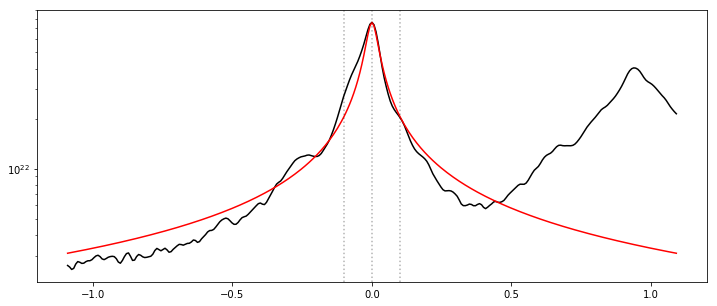

In [49]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(d,n,color='black')
ax.plot(d,n2,color='red')
ax.set_yscale('log')
ax.axvline(0.,linestyle=':',color='k',alpha=0.3)
ax.axvline(0.1,linestyle=':',color='k',alpha=0.3)
ax.axvline(-0.1,linestyle=':',color='k',alpha=0.3)
plt.show()

/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shjiao/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


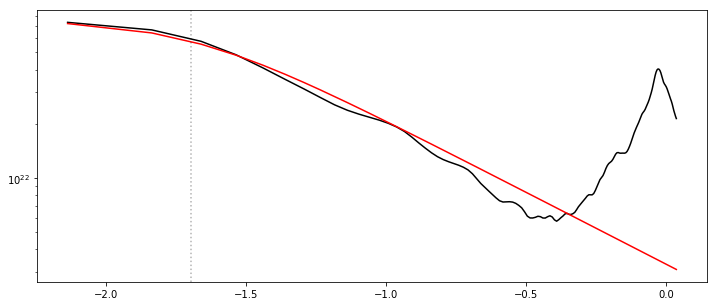

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(np.log10(d),n,color='black')
ax.plot(np.log10(d),n2,color='red')
ax.axvline(np.log10(0.02),linestyle=':',color='k',alpha=0.3)
ax.set_yscale('log')
plt.show()